### Comparing the number of tweets per population as a measure of engagement

In [1]:
import pickle
import numpy as np
import plotly
import pandas as pd
import time
import string

#### Population data taken from here: https://www.ers.usda.gov/data-products/county-level-data-sets/

In [2]:
df = pd.read_csv('Population_Estimates_2010-2016-Table_1.csv')

In [3]:
from copy import deepcopy

df_population = df[['State', 'Area_Name', 'POP_ESTIMATE_2016' ]]
df_population = deepcopy(df_population)

In [4]:
df_population['POP_ESTIMATE_2016'] = df_population.POP_ESTIMATE_2016.apply(lambda x: x.replace(',', ''))

In [5]:
df_population = df_population.rename(columns={'Area_Name': 'county'})

In [6]:
df_population = df_population.rename(columns={'State': 'postal_state'})

In [11]:
# with open('location_df.pkl', 'rb') as picklefile:
#     df_location_final = pickle.load(picklefile)

#### Merge tweets with population

In [12]:
df_location_final = df_location_final.merge(df_population)

In [14]:
grouped = df_location_final.groupby(['state', 'country', 'county', 'POP_ESTIMATE_2016' ]).count()


In [15]:
grouped =grouped.reset_index()[['state', 'country', 'county', 'id', 'POP_ESTIMATE_2016']].sort_values(by='id', ascending=False)

In [16]:
grouped = grouped.rename(columns = {'id':'tweets'}).reset_index(drop=True)

In [17]:
grouped_us = grouped[grouped['country'] == 'United States']

In [19]:
grouped_us['county_pop'] = pd.to_numeric(grouped_us['POP_ESTIMATE_2016'], errors='coerce')

#### ratio of tweets per 10,000 people

In [20]:
grouped_us['ratio'] = (grouped_us['tweets'] / grouped_us['county_pop']) * 10000

In [21]:
grouped_us = grouped_us[grouped_us["state"] != "Kansas"]

In [22]:
grouped_us.head(3)

,state,country,county,tweets,POP_ESTIMATE_2016,county_pop,ratio
0,New York,United States,New York County,2295,1643734,1643734,13.962113
2,California,United States,Los Angeles County,1918,10137915,10137915,1.891908
3,Nevada,United States,Clark County,1190,2155664,2155664,5.520341


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

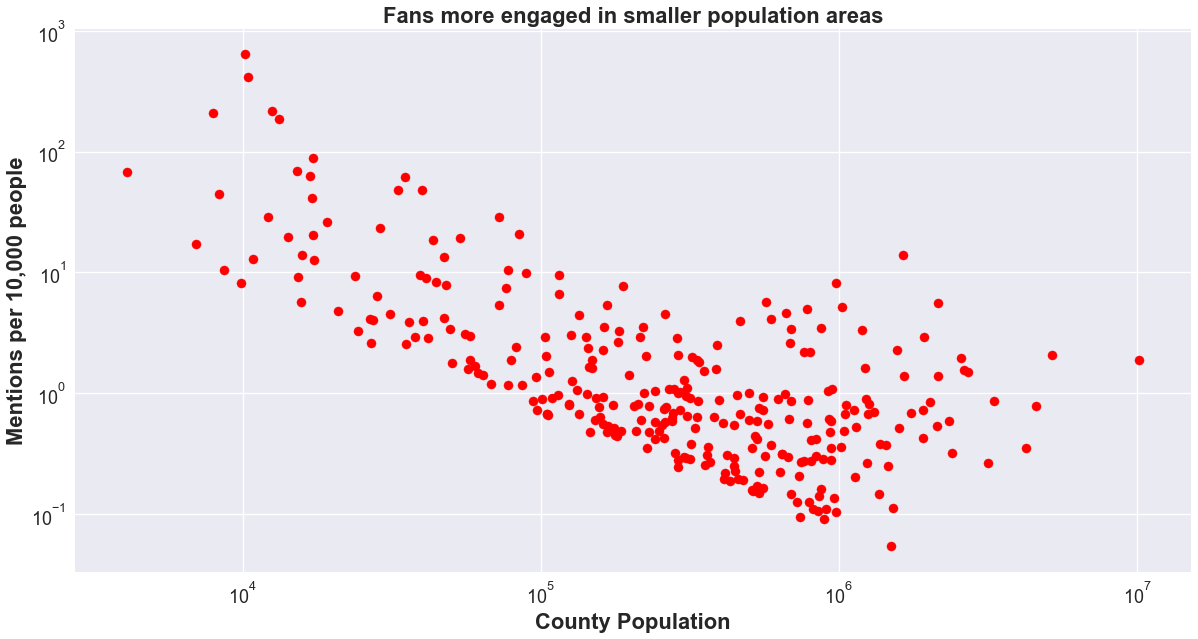

In [26]:
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
from matplotlib import rc, font_manager


fig = plt.figure(figsize=(20,10))
ax = plt.axes()
sns.set_context("talk")
sns.set_style("darkgrid", {'font.family':'sans-serif', 'font.sans-serif':'Arial'})

plt.xlabel('County Population', fontsize=22, fontweight='bold')
plt.ylabel('Mentions per 10,000 people', fontsize=22, fontweight='bold')
plt.title('Fans more engaged in smaller population areas', fontsize=22, fontweight='bold')
ax.set_xscale('log')
ax.set_yscale('log')

ax.tick_params(axis='both', which='major', labelsize=18,labelbottom='on')
ax.scatter(grouped_us['county_pop'],grouped_us['ratio'], color='red');

plt.savefig("3_county_population.png");